## Avaliação Estatística Descritiva

### A- Faça a importação para o Python do arquivo do ENADE 2017 Utilizado em nosso curso (MICRODADOS ENADE 2017.txt)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, norm, dist
from plotly.offline import init_notebook_mode, iplot
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.io as pio
import numpy as np
pio.renderers.default = 'colab'

# Configurações para exibir gráficos no notebook
init_notebook_mode(connected=True)

ImportError: cannot import name 'dist' from 'scipy.stats' (c:\Users\Matheus\miniconda3\envs\PUC\Lib\site-packages\scipy\stats\__init__.py)

In [ ]:
def convert_num(x):
    try:
        return float(x.replace(',', '.').strip())
    except:
        return pd.NA

df_base = pd.read_csv(
        'MICRODADOS_ENADE_2017.txt', 
        sep=';', 
        encoding='latin1',
        converters={
            'NT_OBJ_CE': convert_num,
            'NT_GER': convert_num
        }
    )


In [ ]:
df_base

## B- Faça um filtro escolhendo as seguintes variáveis e as classifique quanto ao tipo de variável (EX: Qualitativa nominal, Quantitativa contínua...)

#### NT_OBJ_FG

In [ ]:
df_base['NT_OBJ_FG'].unique() # Quantitativo Contínu

#### CO_GRUPO

In [ ]:
df_base['CO_GRUPO'].unique() # Quantitativo Discreto

#### CO_REGIAO_CURSO

In [ ]:
df_base['CO_REGIAO_CURSO'].unique() # Quantitativo Discreto

#### QE_I02

In [ ]:
df_base['QE_I02'].unique() # Qualitativo Nominal

#### CO_TURNO_GRADUACAO

In [ ]:
df_base['CO_TURNO_GRADUACAO'].unique() # Qualitativo Ordinal

### C- Escolha um curso do Enade (Não pode ser análise e desenvolvimento de sistemas (ADS) ) e filtre só esse curso para a nossa análise

In [ ]:
df_base.groupby(['CO_GRUPO']).size().sort_values(ascending=False)

In [ ]:
df_base[df_base['CO_GRUPO'] == 5710].groupby(['CO_REGIAO_CURSO']).size()

In [ ]:
df_base[df_base['CO_GRUPO'] == 5710].groupby(['TP_SEXO']).size()

In [ ]:
engenharia_civil = df_base[df_base['CO_GRUPO'] == 5710]

In [ ]:
colunas = [[
    "CO_ORGACAD",
    "CO_MODALIDADE",
    "CO_UF_CURSO",
    "TP_SEXO",
    "CO_TURNO_GRADUACAO",
    "TP_INSCRICAO_ADM",
    "TP_PRES",
    "TP_PR_GER",
    "NT_GER",
    "NT_OBJ_CE",
    "CO_RS_I1",
    "CO_RS_I2",
    "QE_I08",
    "QE_I11",
    "QE_I18",
    "QE_I26",
    "QE_I02"
]]

engenharia_civil_filtrado = engenharia_civil[colunas[0]]


In [ ]:
engenharia_civil_filtrado

### D- Transforme as variáveis colocando os seus devidos rótulos, para que facilite a análise descritiva

In [ ]:
# %pip install openpyxl

In [ ]:
from typing import Dict

# Dicionário de Tipo de Organização Acadêmica
CO_ORGACAD = {
    10019: "Centro Federal de Educação Tecnológica",
    10020: "Centro Universitário",
    10022: "Faculdade",
    10026: "Instituto Federal de Educação, Ciência e Tecnologia",
    10028: "Universidade"
}

# Dicionário de Modalidade do Curso
CO_MODALIDADE = {
    0: "EaD",
    1: "Presencial"
}

# Dicionário de Unidade da Federação do Curso
CO_UF_CURSO = {
    11: "Rondônia (RO)",
    12: "Acre (AC)",
    13: "Amazonas (AM)",
    14: "Roraima (RR)",
    15: "Pará (PA)",
    16: "Amapá (AP)",
    17: "Tocantins (TO)",
    21: "Maranhão (MA)",
    22: "Piauí (PI)",
    23: "Ceará (CE)",
    24: "Rio Grande do Norte (RN)",
    25: "Paraíba (PB)",
    26: "Pernambuco (PE)",
    27: "Alagoas (AL)",
    28: "Sergipe (SE)",
    29: "Bahia (BA)",
    31: "Minas Gerais (MG)",
    32: "Espírito Santo (ES)",
    33: "Rio de Janeiro (RJ)",
    35: "São Paulo (SP)",
    41: "Paraná (PR)",
    42: "Santa Catarina (SC)",
    43: "Rio Grande do Sul (RS)",
    50: "Mato Grosso do Sul (MS)",
    51: "Mato Grosso (MT)",
    52: "Goiás (GO)",
    53: "Distrito Federal (DF)"
}

# Dicionário de Sexo do Aluno
TP_SEXO = {
    "M": "Masculino",
    "F": "Feminino"
}

# Dicionário de Turno da Graduação
CO_TURNO_GRADUACAO = {
    1: "Matutino",
    2: "Vespertino",
    3: "Integral",
    4: "Noturno"
}

# Dicionário de Tipo de Inscrição Administrativa
TP_INSCRICAO_ADM = {
    0: "Tradicional",
    1: "Judicial"
}

# Dicionário de Presença do Aluno
TP_PRES = {
    222: "Ausente",
    333: "Resultado desconsiderado por inscrição indevida",
    334: "Eliminado por participação indevida",
    444: "Ausente devido a dupla graduação",
    555: "Presente com resultado válido",
    556: "Presente com resultado desconsiderado pela Aplicadora",
    888: "Presente com resultado desconsiderado pelo Inep",
    999: "Presente por Ação judicial",
    "": "Não se aplica (sem ensalamento)"
}

# Dicionário de Presença Geral na Prova
TP_PR_GER = {
    222: "Ausente",
    333: "Participação com prova em branco",
    555: "Participação com respostas válidas na prova",
    556: "Participação com resultado desconsiderado pela Aplicadora",
    888: "Participação com resultado desconsiderado pelo Inep",
    "": "Não se aplica (sem ensalamento)"
}
 

# Dicionário 1
# NT_GER: Dict[str, float] = {
#     "min": 0.0,
#     "max": 98.10
# }

# Dicionário 2
# NT_OBJ_CE: Dict[str, float] = {
#     "min": 0.0,
#     "max": 100.0
# }

# Dicionário 3
CO_RS_I1: Dict[str, str] = {
    "A": "Muito fácil",
    "B": "Fácil",
    "C": "Médio",
    "D": "Difícil",
    "E": "Muito difícil",
    "*": "Resposta anulada",
    ".": "Não respondeu"
}

# Dicionário 4 (igual ao 3)
CO_RS_I2: Dict[str, str] = CO_RS_I1.copy()

# Dicionário 5
QE_I08: Dict[str, str] = {
    "A": "Até 1,5 salário mínimo (até R$ 1.405,50)",
    "B": "De 1,5 a 3 salários mínimos (R$ 1.405,51 a R$ 2.811,00)",
    "C": "De 3 a 4,5 salários mínimos (R$ 2.811,01 a R$ 4.216,50)",
    "D": "De 4,5 a 6 salários mínimos (R$ 4.216,51 a R$ 5.622,00)",
    "E": "De 6 a 10 salários mínimos (R$ 5.622,01 a R$ 9.370,00)",
    "F": "De 10 a 30 salários mínimos (R$ 9.370,01 a R$ 28.110,00)",
    "G": "Acima de 30 salários mínimos (mais de R$ 28.110,00)"
}

# Dicionário 6
QE_I11: Dict[str, str] = {
    "A": "Nenhum, pois meu curso é gratuito",
    "B": "Nenhum, embora meu curso não seja gratuito",
    "C": "ProUni integral",
    "D": "ProUni parcial, apenas",
    "E": "FIES, apenas",
    "F": "ProUni Parcial e FIES",
    "G": "Bolsa oferecida por governo estadual, distrital ou municipal",
    "H": "Bolsa oferecida pela própria instituição",
    "I": "Bolsa oferecida por outra entidade (empresa, ONG, outra)",
    "J": "Financiamento oferecido pela própria instituição",
    "K": "Financiamento bancário"
}

# Dicionário 7
QE_I18: Dict[str, str] = {
    "A": "Ensino médio tradicional",
    "B": "Profissionalizante técnico (eletrônica, contabilidade, agrícola, outro)",
    "C": "Profissionalizante magistério (Curso Normal)",
    "D": "Educação de Jovens e Adultos (EJA) e/ou Supletivo",
    "E": "Outra modalidade"
}

# Dicionário 8
QE_I26: Dict[str, str] = {
    "A": "Gratuidade",
    "B": "Preço da mensalidade",
    "C": "Proximidade da minha residência",
    "D": "Proximidade do meu trabalho",
    "E": "Facilidade de acesso",
    "F": "Qualidade/reputação",
    "G": "Foi a única onde tive aprovação",
    "H": "Possibilidade de ter bolsa de estudo",
    "I": "Outro motivo"
}

# Dicionário 9
QE_I02: Dict[str, str] = {
    "A": "Branca",
    "B": "Preta",
    "C": "Amarela",
    "D": "Parda",
    "E": "Indígena",
    "F": "Não quero declarar"
}



In [ ]:
engenharia_civil_filtrado['CO_ORGACAD'] = engenharia_civil_filtrado['CO_ORGACAD'].map(CO_ORGACAD)
engenharia_civil_filtrado['CO_MODALIDADE'] = engenharia_civil_filtrado['CO_MODALIDADE'].map(CO_MODALIDADE)
engenharia_civil_filtrado['CO_UF_CURSO'] = engenharia_civil_filtrado['CO_UF_CURSO'].map(CO_UF_CURSO)
engenharia_civil_filtrado['TP_SEXO'] = engenharia_civil_filtrado['TP_SEXO'].map(TP_SEXO)
engenharia_civil_filtrado['CO_TURNO_GRADUACAO'] = engenharia_civil_filtrado['CO_TURNO_GRADUACAO'].map(CO_TURNO_GRADUACAO)
engenharia_civil_filtrado['TP_INSCRICAO_ADM'] = engenharia_civil_filtrado['TP_INSCRICAO_ADM'].map(TP_INSCRICAO_ADM)
engenharia_civil_filtrado['TP_PRES'] = engenharia_civil_filtrado['TP_PRES'].map(TP_PRES)
engenharia_civil_filtrado['TP_PR_GER'] = engenharia_civil_filtrado['TP_PR_GER'].map(TP_PR_GER)
engenharia_civil_filtrado['CO_RS_I1'] = engenharia_civil_filtrado['CO_RS_I1'].map(CO_RS_I1)
engenharia_civil_filtrado['CO_RS_I2'] = engenharia_civil_filtrado['CO_RS_I2'].map(CO_RS_I2)
engenharia_civil_filtrado['QE_I08'] = engenharia_civil_filtrado['QE_I08'].map(QE_I08)
engenharia_civil_filtrado['QE_I11'] = engenharia_civil_filtrado['QE_I11'].map(QE_I11)
engenharia_civil_filtrado['QE_I18'] = engenharia_civil_filtrado['QE_I18'].map(QE_I18)
engenharia_civil_filtrado['QE_I26'] = engenharia_civil_filtrado['QE_I26'].map(QE_I26)
engenharia_civil_filtrado['QE_I02'] = engenharia_civil_filtrado['QE_I02'].map(QE_I02)


In [ ]:
engenharia_civil_filtrado

### E- Faça as estatísticas descritivas do seu banco (Resumo geral), avaliando se há variáveis faltantes ou não, e se existirem, elimine-as

In [ ]:
engenharia_civil_dropna = engenharia_civil_filtrado.dropna()

In [ ]:
engenharia_civil_dropna

##### Especifico

In [182]:
engenharia_civil_dropna['NT_OBJ_CE'] = pd.to_numeric(engenharia_civil_dropna['NT_OBJ_CE'], errors='coerce')

moda_series = engenharia_civil_dropna['NT_OBJ_CE'].mode()
moda_value = moda_series.iloc[0] if not moda_series.empty else None

estatisticas_componente_especifico = {
    'quantidade': engenharia_civil_dropna['NT_OBJ_CE'].count(),
    'media': engenharia_civil_dropna['NT_OBJ_CE'].mean(),
    'mediana': engenharia_civil_dropna['NT_OBJ_CE'].median(),
    'moda': moda_value,
    'maximo': engenharia_civil_dropna['NT_OBJ_CE'].max(),
    'minimo': engenharia_civil_dropna['NT_OBJ_CE'].min(),
    'dp': engenharia_civil_dropna['NT_OBJ_CE'].std(),
    'cv': engenharia_civil_dropna['NT_OBJ_CE'].std() / engenharia_civil_dropna['NT_OBJ_CE'].mean() * 100,
    'assimetria': skew(engenharia_civil_dropna['NT_OBJ_CE']),
    'curtose': kurtosis(engenharia_civil_dropna['NT_OBJ_CE'])
}
estatisticas_componente_especifico

C:\Users\Matheus\AppData\Local\Temp\ipykernel_24552\3472461254.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



{'quantidade': np.int64(47679),
 'media': np.float64(44.33845089032908),
 'mediana': 42.1,
 'moda': np.float64(42.1),
 'maximo': 100.0,
 'minimo': 0.0,
 'dp': 15.888084643858008,
 'cv': np.float64(35.833648503320745),
 'assimetria': np.float64(0.2156674555871196),
 'curtose': np.float64(-0.22070593367537716)}

In [192]:
media_ce = estatisticas_componente_especifico['media']
desvio_padrao_ce = estatisticas_componente_especifico['dp']

dist = norm(loc=media_ce, scale=desvio_padrao_ce)

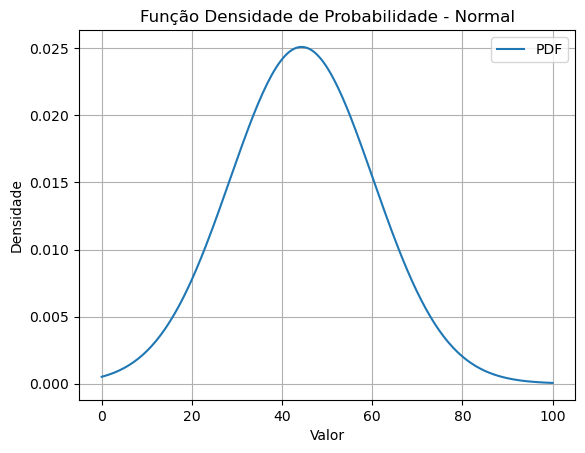

In [ ]:
valores = np.linspace(0, 100, 200)

# Função densidade de probabilidade (PDF)
probabilities = dist.pdf(valores)
plt.plot(valores, probabilities, label='PDF')
plt.title('Função Densidade de Probabilidade - Normal')
plt.xlabel('Valor')
plt.ylabel('Densidade')
plt.legend()
plt.grid(True)
plt.show()

In [218]:
prob_nota = norm.cdf(x=50, loc=media_ce, scale=desvio_padrao_ce) - norm.cdf(x=35, loc=media_ce, scale=desvio_padrao_ce)
print(f'Probabilidade de nota entre 35 e 50 : {prob_nota:.4f}')

Probabilidade de nota entre 35 e 50 : 0.3609


In [ ]:
# Gráficos da análise descritiva para nota dos alunos de ADS
fig, axs = plt.subplots(3, 1, figsize=(15, 20))

# Histograma
sns.histplot(engenharia_civil_dropna['NT_OBJ_CE'], bins=50, stat='density', color='lightblue', ax=axs[0], edgecolor='black')
axs[0].set_title('Histograma da nota dos componentes específicos dos alunos de Engenharia Civil')
axs[0].set_xlabel('Nota')
axs[0].set_ylabel('Densidade')

# Curva de densidade (corrigida)
sns.kdeplot(
    engenharia_civil_dropna['NT_OBJ_CE'],
    color='red',
    ax=axs[1],
    bw_adjust=2,     # suaviza as flutuações
    cut=0,           # não extrapola além dos dados
    gridsize=200     # mais pontos para uma curva suave
)
axs[1].set_title('Curva de densidade suavizada da nota dos componentes específicos dos alunos de Engenharia Civil')
axs[1].set_xlabel('Nota')
axs[1].set_ylabel('Densidade')


# Histograma e curva de densidade juntos
sns.histplot(
    engenharia_civil_dropna['NT_OBJ_CE'],
    bins=50,
    stat='density',
    color='lightblue',
    ax=axs[2],
    edgecolor='black'
)
sns.kdeplot(
    engenharia_civil_dropna['NT_OBJ_CE'],
    color='red',
    ax=axs[2],
    bw_adjust=2,
    cut=0,
    gridsize=200
)
axs[2].set_title('Histograma e curva de densidade suavizada da nota dos componentes específicos dos alunos de Engenharia Civil')
axs[2].set_xlabel('Nota')
axs[2].set_ylabel('Densidade')


plt.tight_layout()
plt.show()

##### Geral

In [183]:
engenharia_civil_dropna['NT_GER'] = pd.to_numeric(engenharia_civil_dropna['NT_GER'], errors='coerce')

moda_series = engenharia_civil_dropna['NT_GER'].mode()
moda_value = moda_series.iloc[0] if not moda_series.empty else None

estatisticas_nota_geral = {
    'quantidade': engenharia_civil_dropna['NT_GER'].count(),
    'media': engenharia_civil_dropna['NT_GER'].mean(),
    'mediana': engenharia_civil_dropna['NT_GER'].median(),
    'moda': moda_value,
    'maximo': engenharia_civil_dropna['NT_GER'].max(),
    'minimo': engenharia_civil_dropna['NT_GER'].min(),
    'dp': engenharia_civil_dropna['NT_OBJ_CE'].std(),
    'cv': engenharia_civil_dropna['NT_GER'].std() / engenharia_civil_dropna['NT_GER'].mean() * 100,
    'assimetria': skew(engenharia_civil_dropna['NT_GER']),
    'curtose': kurtosis(engenharia_civil_dropna['NT_GER'])
}
estatisticas_nota_geral

C:\Users\Matheus\AppData\Local\Temp\ipykernel_24552\3204975768.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



{'quantidade': np.int64(47679),
 'media': np.float64(44.087908722917845),
 'mediana': 43.4,
 'moda': np.float64(38.1),
 'maximo': 96.4,
 'minimo': 0.0,
 'dp': 15.888084643858008,
 'cv': np.float64(30.454329425326073),
 'assimetria': np.float64(0.19366624825496107),
 'curtose': np.float64(-0.13561781194797495)}

In [219]:
media_ng = estatisticas_nota_geral['media']
desvio_padrao_ng = estatisticas_nota_geral['dp']

dist = norm(loc=media_ng, scale=desvio_padrao_ng)

In [221]:
prob_nota = norm.cdf(x=50, loc=media_ng, scale=desvio_padrao_ng) - norm.cdf(x=35, loc=media_ng, scale=desvio_padrao_ng)
print(f'Probabilidade de nota entre 35 e 50 : {prob_nota:.4f}')

Probabilidade de nota entre 35 e 50 : 0.3614


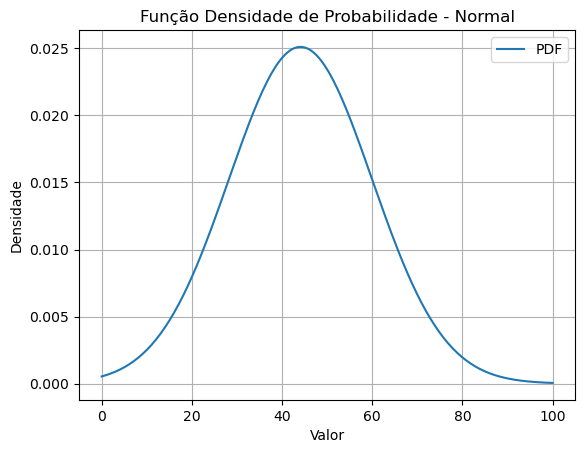

In [220]:
valores = np.linspace(0, 100, 200)

# Função densidade de probabilidade (PDF)
probabilities = dist.pdf(valores)
plt.plot(valores, probabilities, label='PDF')
plt.title('Função Densidade de Probabilidade - Normal')
plt.xlabel('Valor')
plt.ylabel('Densidade')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Gráficos da análise descritiva para nota dos alunos de ADS
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Histograma
sns.histplot(engenharia_civil_dropna['NT_GER'], bins=50, stat='density', color='lightblue', ax=axs[0], edgecolor='black')
axs[0].set_title('Histograma da nota geral dos alunos de Engenharia Civil')
axs[0].set_xlabel('Nota')
axs[0].set_ylabel('Densidade')

# Curva de densidade
sns.kdeplot(engenharia_civil_dropna['NT_GER'], color='red', ax=axs[1])
axs[1].set_title('Curva de densidade da nota geral dos alunos de Engenharia Civil')
axs[1].set_xlabel('Nota')
axs[1].set_ylabel('Densidade')

# Histograma e curva de densidade juntos
sns.histplot(engenharia_civil_dropna['NT_GER'], bins=50, stat='density', color='lightblue', ax=axs[2], edgecolor='black')
sns.kdeplot(engenharia_civil_dropna['NT_GER'], color='red', ax=axs[2])
axs[2].set_title('Histograma e curva de densidade da nota geral dos alunos de Engenharia Civil')
axs[2].set_xlabel('Nota')
axs[2].set_ylabel('Densidade')

plt.tight_layout()
plt.show()